In [1]:
import pandas as pd
import numpy as np

In [2]:
## Loading the data set
df=pd.read_csv('Forestfires.csv')

In [3]:
## Checking shape of the data
df.shape

(517, 31)

In [4]:
#checking the data
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## In above data month & day colum have already converted into numerical using one hot encoding so we drop it.

In [5]:
df2=df.drop(['month','day'],axis=1)

In [6]:
df2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [7]:
df2['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [8]:
## Converting size catogory into numerical values by using one hot encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df2['size_category']=label_encoder.fit_transform(df2['size_category'])

In [9]:
df2['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [10]:
## Spliting data into target & fetures
x=df2.drop(['size_category'],axis=1)
y=df2['size_category']

In [11]:
## spliting our data into train & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## From above observation our target is not normally distributed so first we normally distributed our target using SMOTE technique

In [27]:
!pip install imbalanced-learn

## Implementation of SMOTE Technique

In [12]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)
x_tes,y_tes=sm.fit_resample(x_test, y_test)

In [13]:
x_res.shape

(608, 28)

In [14]:
y_res.value_counts()

0    304
1    304
Name: size_category, dtype: int64

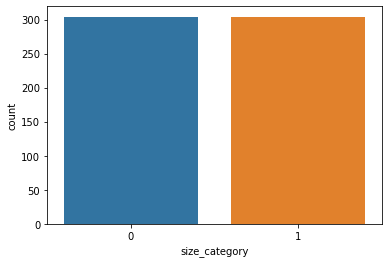

In [17]:
import seaborn as sns
sns.countplot(y_res)
import warnings
warnings.filterwarnings('ignore')

In [18]:
y_train.value_counts()

1    304
0    109
Name: size_category, dtype: int64

In [19]:
y_test.shape

(104,)

In [20]:
y_tes.shape

(148,)

<AxesSubplot:xlabel='size_category', ylabel='count'>

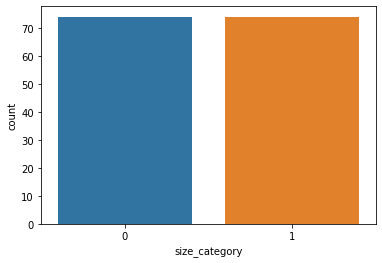

In [21]:
sns.countplot(y_tes)

In [22]:
y_tes.value_counts()

0    74
1    74
Name: size_category, dtype: int64

## Building the model

In [23]:
## Importing the laibaries
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

## Grid search CV

In [25]:
clf = SVC()
param_grid = [{'kernel':['linear'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_res,y_res)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['linear']}])

In [26]:
gsv.best_params_ , gsv.best_score_

({'C': 0.1, 'gamma': 50, 'kernel': 'linear'}, 0.9934426229508198)

# Building the final model

In [27]:
clf = SVC(C= 0.1, gamma =0.5,kernel='linear')
clf.fit( x_res, y_res)
y_pred = clf.predict(x_tes)
acc = accuracy_score(y_tes, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_tes, y_pred)

Accuracy = 97.97297297297297


array([[73,  1],
       [ 2, 72]], dtype=int64)

In [31]:
cm=confusion_matrix(y_tes, y_pred)

## Our model is 97% accurate

In [28]:
## Checking the recall of the model
from sklearn.metrics import recall_score
recall = recall_score(y_tes,y_pred)
print(recall)

0.972972972972973


## Here FN has maximum importance so we calculate recall for furhter evaluation so model recall is 97.29%

In [29]:
## Checking prescion of the model
from sklearn.metrics import precision_score
prescion = precision_score(y_tes,y_pred)
print(prescion)

0.9863013698630136


## The prescion of our model is 98.63%

Text(42.0, 0.5, 'actual')

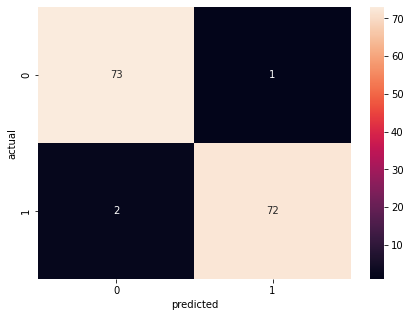

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')